# numpy 最初の一歩
まずは、numpy の基本となる型の多次元配列 N-dimensional array (**ndarray**)に慣れよう。
numpy モジュールをインポートし、1, 2, 3, 4, 5 という５つの整数の集合を表す ndarray 型の変数aを定義する。

In [2]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])
#type(a) #型名の表示
#a.dtype #要素の型名

print("最初の一歩") 
print(a)

最初の一歩
[1 2 3 4 5]


In [3]:
#要素の合計、平均、最大値
print(a.sum())
print(a.mean())
print(a.max())


15
3.0
5


リストと同様の方法で、各要素を編集できる。たとえば、３番目の要素を整数10にして、
４番目の要素を1000にするには：

In [4]:
a[2]=10
a[3]=1000
print(a)

[   1    2   10 1000    5]


要素の追加は次のように行う。たとえば、[100, 200] を追加しよう。

In [5]:
a = np.append(a, [100, 200])
print(a)


[   1    2   10 1000    5  100  200]


range() と同様に arange() で自然数の数列が生成できる。

In [6]:
b = np.arange(9)
print(b)

[0 1 2 3 4 5 6 7 8]


linspace() --- グラフ作成で頻出のテクニック：　3 と 10　の間を4等分した**等差数列**を作る

In [7]:
c = np.linspace(3, 10, 11)
print(c)

[ 3.   3.7  4.4  5.1  5.8  6.5  7.2  7.9  8.6  9.3 10. ]


logspace() -- 対数グラフ作成で頻出のテクニック：　10の3乗と８乗の間を対数で４等分した**等比数列を作**る

In [8]:
d = np.logspace(3, 8, num=5, base=10.0)
print(d)


[1.00000000e+03 1.77827941e+04 3.16227766e+05 5.62341325e+06
 1.00000000e+08]


In [9]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# ２次元配列、３次元配列

Numpy の配列は、1次元配列(ベクトル)、2次元配列(行列) 、3次元配列、、、というように、高次元の配列を作ることができる。

In [10]:
# ２次元配列
e = np.array([[50, 80, 45], [55, 100, 90]])
print(e)

[[ 50  80  45]
 [ 55 100  90]]


2次元配列は、１次元配列を並べて作る、と考えられる。
まずは、ある生徒についての教科の点数を並べたベクトル（１次元配列）を作り、
それをいろいろな生徒について並べて行列（２次元配列）にするというイメージの例を示そう。

In [11]:
s0 = np.array([50, 80, 45]) ## 数学５０，　英語80, 国語　45
s1 = np.array([55, 100, 95]) ## 数学５5，　英語100, 国語　95
group1 = np.array([s0, s1])
group1

array([[ 50,  80,  45],
       [ 55, 100,  95]])

In [12]:
s0.ndim,  group1.ndim  ## .ndim で次元数が調べられる。次元数２ということは、axisが２つある

(1, 2)

In [13]:
group1.shape  ## .shape で各軸の要素数がわかる  (axis0の要素数、axis1の要素数、、、)

(2, 3)

In [14]:
group1.sum(axis=0) ##教科ごと合計点(axis=0は生徒の並びベクトル)

array([105, 180, 140])

In [15]:
group1.sum(axis=1)  ##それぞれの生徒について、３教科の合計点を出す（axis=1は教科の並びベクトル）

array([175, 250])

In [16]:
s3 = np.array([50, 50, 50]) 
s4 = np.array([40, 50, 70])
group2 = np.array([s3, s4])
group2

array([[50, 50, 50],
       [40, 50, 70]])

In [17]:
# グループを並べることで３次元化
team = np.array([group1, group2])
team.shape

(2, 2, 3)

In [18]:
print(team)

[[[ 50  80  45]
  [ 55 100  95]]

 [[ 50  50  50]
  [ 40  50  70]]]


In [19]:
tsum = team.sum(axis=2) #３次元にしたら、教科の並びベクトルがaxis=2になっている
tsum = team.sum(axis=1) 
tsum

array([[105, 180, 140],
       [ 90, 100, 120]])

In [20]:
team.sum(axis=0).shape

(2, 3)

すべての要素を0とする行列を簡単に作る方法：

In [21]:
g = np.zeros((3,4)) # (3,4)というタプルをzeros()に渡す
g

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# array の演算


In [22]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

**各要素に**一様に10を足すことを次のように簡単にできる。

In [23]:
b = a + 10
b

array([10, 11, 12, 13, 14, 15])

各要素を３倍しよう。

In [24]:
c = a * 3
c

array([ 0,  3,  6,  9, 12, 15])

array 同士の四則演算（要素数は等しい必要がある）

In [25]:
d = b + c
d

array([10, 14, 18, 22, 26, 30])

In [26]:
e = b * c
e

array([  0,  33,  72, 117, 168, 225])

In [27]:
f = b + 2*c
f

array([10, 17, 24, 31, 38, 45])

In [28]:
g = np.array([3, 1, 2])
h = np.array([2, 3, 1])
gh = g*h # array の掛け算（アダマール積）
gdoth = g.dot(h)       #内積
gdoth2 = np.dot(g,h)   #内積(別の方法)
print("gh=", gh)
print("gdoth = ", gdoth, " = ", 3*2+1*3+2*1)
print("gdoth2 = ", gdoth2, " = ", 3*2+1*3+2*1)

gh= [6 3 2]
gdoth =  11  =  11
gdoth2 =  11  =  11


# matplotlib によるグラフ作成
二次関数 y = x**2 + 100 を x = 10--100 の範囲でプロットする。 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
x = np.arange(10, 100, 2)
x

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [31]:
y = x*x +100
y

array([ 200,  244,  296,  356,  424,  500,  584,  676,  776,  884, 1000,
       1124, 1256, 1396, 1544, 1700, 1864, 2036, 2216, 2404, 2600, 2804,
       3016, 3236, 3464, 3700, 3944, 4196, 4456, 4724, 5000, 5284, 5576,
       5876, 6184, 6500, 6824, 7156, 7496, 7844, 8200, 8564, 8936, 9316,
       9704])

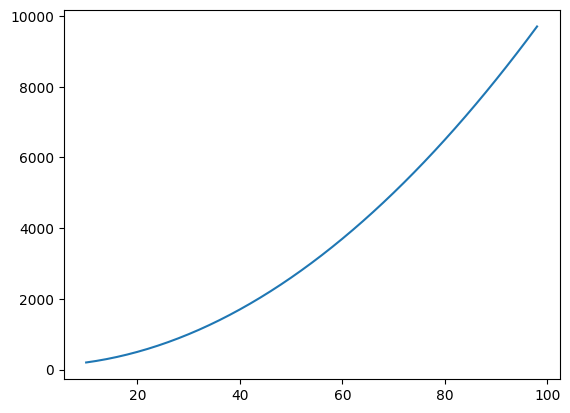

In [32]:
plt.plot(x,y)

log をとって片対数のグラフにしてみよう。 **np.log10()** で常用対数になる。y は配列であるが、np.log10(y) でｙの全要素が一様に対数になるので便利。

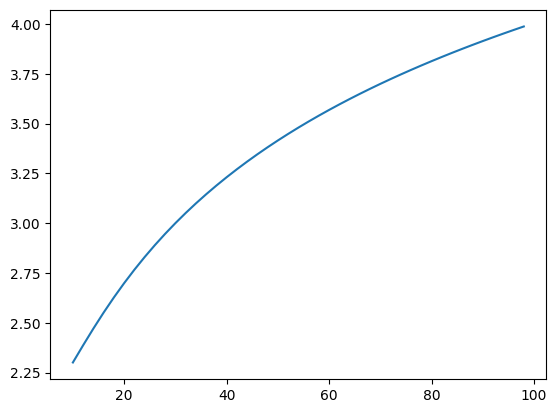

In [33]:
plt.plot(x, np.log10(y))

グラフを４つ並べるため、subplots を使ってみよう。

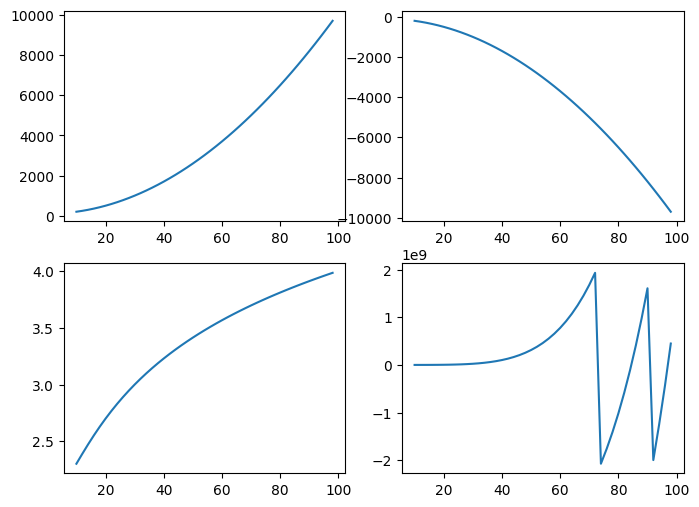

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
axs[0, 0].plot(x, y) # upper left
axs[0, 1].plot(x, -y) # upper right
axs[1, 0].plot(x, np.log10(y)) # lower left
axs[1, 1].plot(x, x**5) # lower right

# ヒストグラム作成

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

１４人の学生の身長を測定し、168 cm, 180 cm, 171 cm, .. だったとする。頻度分布をつくるために用いるのが hist() である。

(array([4., 2., 3., 0., 1., 2., 0., 0., 1., 1.]),
 array([163. , 166.2, 169.4, 172.6, 175.8, 179. , 182.2, 185.4, 188.6,
        191.8, 195. ]),
 <BarContainer object of 10 artists>)

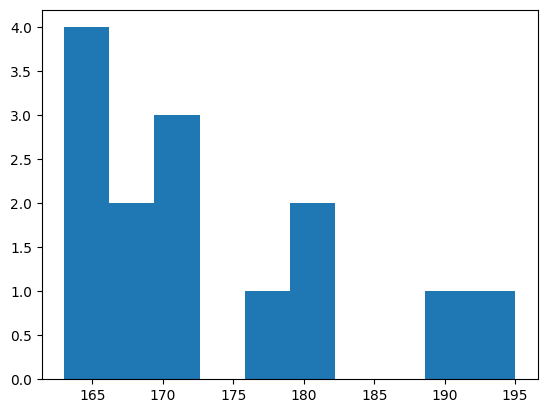

In [36]:
x = np.array([168, 180, 171, 177, 165, 182, 170, 163, 165, 166, 167, 190, 195, 170])

plt.hist(x)


上の図で、163-172 cm に３つの長方形（横が身長のレンジ、縦が頻度）がある。
各長方形をビンとよび（正確な言い方ではないが、、）、「３つ目にビンに3人が入っている」
のような言い方をする。
ビンの作り方を明示的に指定するには次のようにする。
150cmから200cmの範囲を10個のビンに分けるヒストグラムを作る方法：

(array([0., 0., 1., 5., 3., 1., 2., 0., 1., 1.]),
 array([150., 155., 160., 165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 10 artists>)

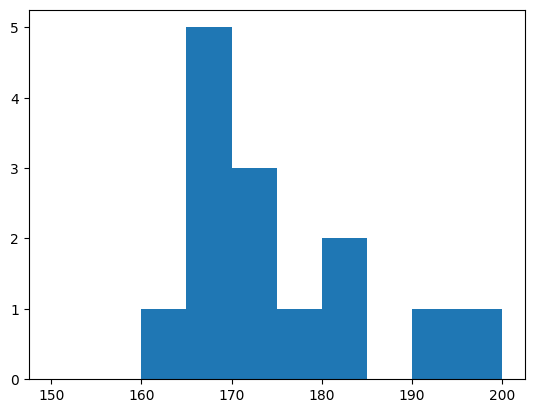

In [37]:
MINMAX = (150, 200)
BIN = 10
plt.hist(x, bins=BIN, range=MINMAX)

# データ可視化の重要性
e-Stat (政府統計の総合窓口）で学校保健統計調査の結果をダウンロードし、
身長の分布をグラフにして可視化してみよう。

* e-Statは生データは非公開でヒストグラムのみ。


In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

身長を x [cm] とする。 (上のセクションでも x を使ったので、同じ変数にするのは実はちょっと危険だが）

In [39]:
x = np.array([146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195])

平成２８年の男子１７歳の身長頻度分布（ヒストグラム）を h28 とする。単位は‰（パーミル）で、％の1/10。
x = 147 で、h28 = 0.1 というのは、147-148 cm (注）に全体の0.01％が入るということ。
（注）たぶんあっているが、もしかしたら146-147 cm　かもしれないし、146.5-147.5 かもしれない。e-Stat のサイトでこの情報がみつからない。

In [40]:
h28 = np.array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.3,  0.5,  0.5,  0.7,  1.7,  2. ,
        3.7,  4.7,  9.3, 14. , 17.3, 23. , 29.7, 37.5, 42.2, 51.5, 55.9,
       60.1, 64.6, 74.6, 69.5, 65.2, 63.1, 56.5, 50.4, 45.1, 37.3, 28.4,
       22.1, 21.5, 14.6, 11.4,  6.6,  4.2,  3.9,  1.9,  1.4,  0.7,  1.1,
        0.4,  0.1,  0. ,  0.2,  0.1,  0. ]) # １つ１つの値はパーセントを示す。

実際は、CSV ファイルを読み込んだり、エクセルを読み込んだりして、データを入力することになるが、ここでは数値をベタ打ちした。

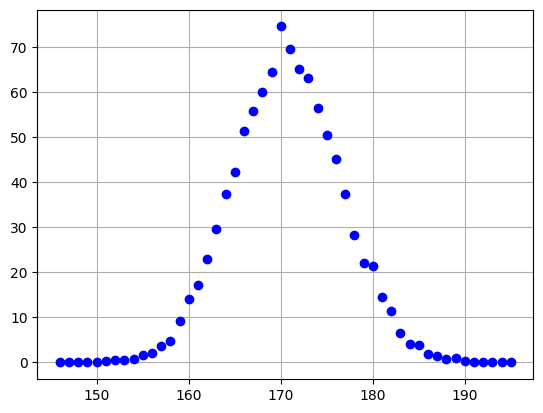

In [41]:
plt.plot(x,h28, 'o', color='blue')
plt.grid(True)

170 cm に明らかに不自然な超過が見られる。（これを見て、そう思えるようになるには、訓練が必要だし、そのような目を持てる人は実は非常に少ない）
別の年度を見てみよう。

* 通常このような特徴は可視化しなければ見つけることができない。
* このような分布を「正規分布」という。
* 

**平成２7年**の男子１７歳の身長頻度分布（ヒストグラム）を h27 とする。単位は‰（パーミル）.


In [42]:
h27 = np.array([ 0. ,  0. ,  0. ,  0.2,  0.2,  0.3,  0.6,  0.8,  0.6,  1.5,  1.7,
        4.4,  4.9,  8.3, 13.5, 18.4, 22.1, 28.3, 34.8, 42. , 50.8, 57.3,
       62.3, 61.4, 73.5, 71.2, 70.3, 65.1, 56.8, 48.8, 44.1, 38.4, 28.3,
       23.5, 19.4, 13.8, 10.1,  7.2,  5. ,  4. ,  2.7,  1. ,  0.7,  0.4,
        0.6,  0.3,  0.1,  0. ,  0. ,  0. ])
#len(h27)

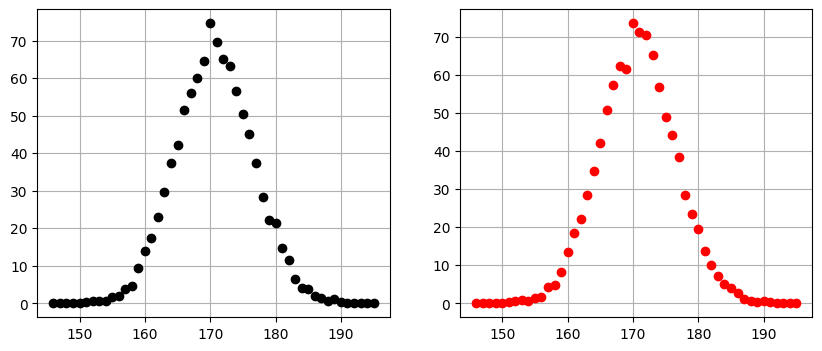

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(x, h28, 'o', color='black') # H28 
axs[0].grid(True)
axs[1].plot(x, h27, 'o', color='red') # H27
#axs[1].plot(x, h28, 'x', color='black') # H28 を同じ図に重ねたいとき
axs[1].grid(True)

案の定、169 cm と 170 cm で飛びがある。さあ、いよいよ 170 cm があやしい。これは「ずる」が行われたのではないだろうか？大台に乗っておきたいという男子高生の心理は、十分に理解できる。さらに4年分をプロットしてみよう。

In [44]:
h26 = np.array([ 0.1,  0. ,  0. ,  0.2,  0.1,  0.7,  0.5,  0.5,  1.1,  1.8,  1.9,
        4. ,  5.7,  6.9, 11.4, 15.5, 23.6, 32. , 36.5, 46.2, 51.1, 55.4,
       63.4, 62.1, 72.8, 70.6, 65.2, 64.3, 56.6, 50.8, 40.2, 40.5, 30.7,
       22.1, 18.2, 13.7, 10.4,  7.7,  6. ,  3.8,  1.8,  1.3,  1.3,  0.8,
        0.1,  0.3,  0.2,  0. ,  0. ,  0. ])
#len(h26)

In [45]:
h25 = np.array([ 0. ,  0. ,  0. ,  0.2,  0.1,  0.6,  0.5,  0.5,  0.9,  1.1,  2.7,
        3.5,  5.3,  7.6, 11.8, 18.8, 23. , 29.4, 34.5, 43.7, 50.7, 57.6,
       63.1, 64.9, 73.6, 66.8, 69.8, 61.4, 62.8, 51.1, 44.1, 35.2, 26.6,
       22.1, 18.6, 13.9, 10.6,  7.2,  5.7,  4.2,  2.5,  1.1,  0.8,  0.5,
        0.3,  0.3,  0.1,  0. ,  0. ,  0. ])
#len(h25)

In [46]:
h24 = np.array([ 0.2,  0. ,  0.3,  0. ,  0.7,  1. ,  1.2,  1.5,  3.6,  4.2,  9.5,
       10.5, 13.2, 18.7, 25.2, 31.6, 36.8, 44.9, 50.5, 59. , 62.4, 67.2,
       69.4, 65.8, 66.4, 60.5, 59.3, 48.4, 41.9, 34. , 28.2, 22.7, 15.3,
       13.5, 10.4,  7.2,  4.3,  3.8,  2.6,  1.5,  0.8,  0.5,  0.3,  0.4,
        0. ,  0. ,  0.1,  0.1,  0. ,  0. ])
len(h24)

50

In [47]:
h24 = np.array([ 0.1,  0. ,  0.1,  0. ,  0.1,  0.7,  0.5,  0.8,  0.9,  1.3,  3. ,
        3.7,  5.6,  6.8, 14.6, 16.4, 23.7, 28.5, 34.5, 44. , 47.4, 55.8,
       64.3, 62.4, 75.5, 70.4, 64.4, 63.4, 59.6, 49.6, 44.8, 36.4, 29.1,
       23.4, 19. , 14.1, 10.4,  7.7,  4.9,  5. ,  2.8,  1.9,  0.7,  0.5,
        0.5,  0.3,  0. ,  0.2,  0. ,  0. ])

In [48]:
h23 = np.array([ 0. ,  0. ,  0.2,  0.4,  0.2,  0.4,  0.7,  0.6,  1.5,  2.1,  1.6,
        3.7,  7.3,  8. , 13.2, 16.4, 21.4, 27.4, 30.8, 46.5, 48.9, 52.9,
       62.7, 67.4, 69.7, 73.6, 65. , 65.8, 60.3, 50.7, 43.2, 39.8, 30.1,
       23.4, 19.9, 15.3,  9.4,  7.2,  4.6,  1.7,  2.2,  1.5,  0.6,  0.4,
        0.7,  0.1,  0.3,  0.2,  0. ,  0. ])
len(h23)

50

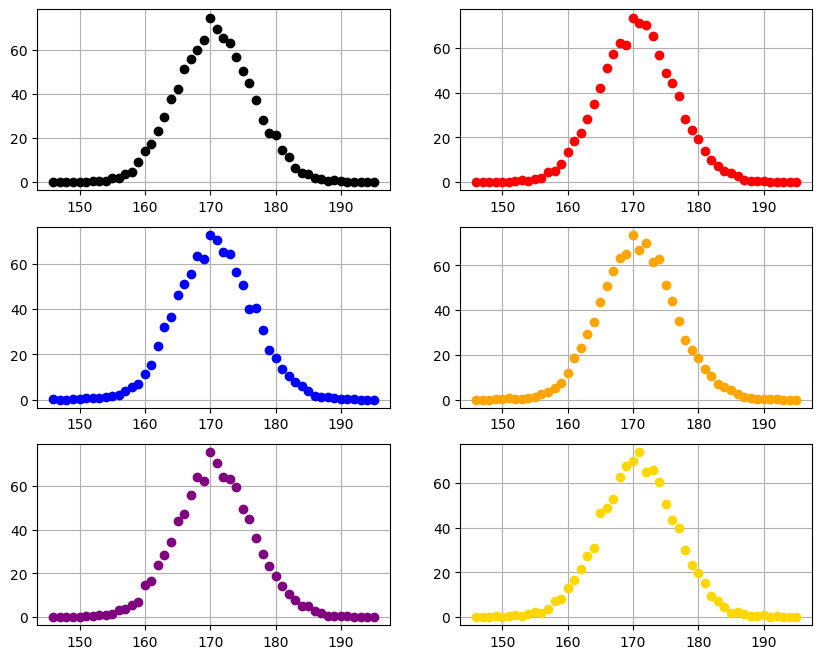

In [49]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
axs[0, 0].plot(x, h28, 'o', color='black') # H28 
axs[0, 0].grid(True)
axs[0, 1].plot(x, h27, 'o', color='red') # H27
axs[0, 1].grid(True)
axs[1, 0].plot(x, h26, 'o', color='blue') # H26 
axs[1, 0].grid(True)
axs[1, 1].plot(x, h25, 'o', color='orange') # H25
axs[1, 1].grid(True)
axs[2, 0].plot(x, h24, 'o', color='purple') # H24 
axs[2, 0].grid(True)
axs[2, 1].plot(x, h23, 'o', color='gold') # H23
axs[2, 1].grid(True)

6年のうち５つの年で共通して 170 cm の飛びが見られ、かつ 169 cm の凹みも見られる。
**「男子高３生の見栄で 170 cmで飛びが生じる」**仮説（いわゆる内山仮説）は、なかなか有力と言えよう。
(一番古いH23のデータではなぜかこの効果が見られないので、H22以前も見ておくべきだろう）

ばらつきを抑えるために６年分の平均をとると、169-170 の構造は非常にはっきりと確認できる。


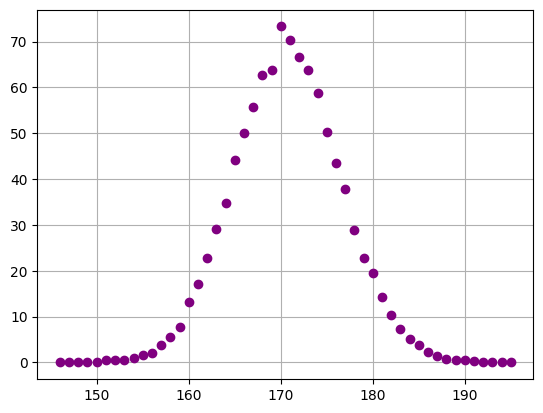

In [50]:
plt.plot(x, (h23+h24+h25+h26+h27+h28)/6., 'o', color='purple')
plt.grid(True)

ついでに、ガウス分布（正規分布）であることを視覚的に確認するために、平均身長 (h23) の170.7 cmを使って、次のようなプロットを作ると、見事に直線が現れる。たしかにガウシアンライクである。（なお、log をとるところで簡易的に log(0) を回避するために、非常に小さい数δを足している。） ガウス分布の数式を見て、直線になる理由を考えよう。
(よく見ると、185 cm 程度から上で、ガウス分布からのズレが見える気がする。
確認する価値はあるだろう）



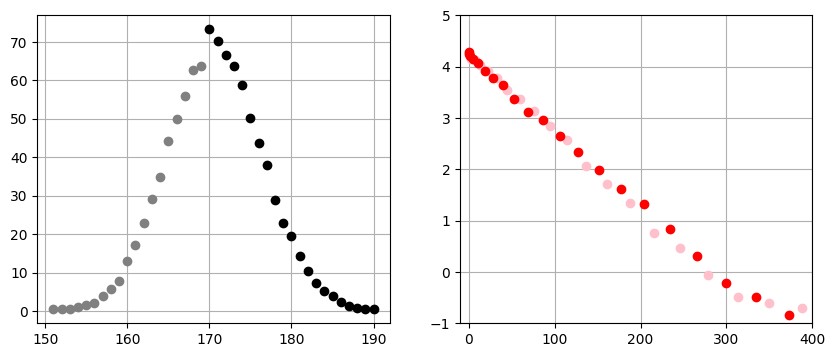

In [51]:
h23_mean = 170.7
xx = (x-h23_mean)*(x-h23_mean)
delta = 0.0000001
h_sum = (h23+h24+h25+h26+h27+h28)/6.0+delta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(x[5:24], h_sum[5:24], 'o', color='gray')    # [:24] によって前半のみプロット
axs[0].plot(x[24:45], h_sum[24:45], 'o', color='black') 
axs[0].grid(True)
axs[1].plot(xx[5:24], np.log(h_sum)[5:24], 'o', color='pink') 
axs[1].plot(xx[24:45], np.log(h_sum)[24:45], 'o', color='red') 
axs[1].set_xlim(-10, 400)     #x軸の範囲指定
axs[1].set_ylim(-1, 5)         #y軸の範囲指定
axs[1].grid(True)

最後にマジックコマンド **whos** を使って、どんな変数が机に乗っているか、見ておこう。

In [52]:
%whos

Variable   Type       Data/Info
-------------------------------
BIN        int        10
MINMAX     tuple      n=2
a          ndarray    6: 6 elems, type `int32`, 24 bytes
axs        ndarray    2: 2 elems, type `object`, 16 bytes
b          ndarray    6: 6 elems, type `int32`, 24 bytes
c          ndarray    6: 6 elems, type `int32`, 24 bytes
d          ndarray    6: 6 elems, type `int32`, 24 bytes
delta      float      1e-07
e          ndarray    6: 6 elems, type `int32`, 24 bytes
f          ndarray    6: 6 elems, type `int32`, 24 bytes
fig        Figure     Figure(1000x400)
g          ndarray    3: 3 elems, type `int32`, 12 bytes
gdoth      int32      11
gdoth2     int32      11
gh         ndarray    3: 3 elems, type `int32`, 12 bytes
group1     ndarray    2x3: 6 elems, type `int32`, 24 bytes
group2     ndarray    2x3: 6 elems, type `int32`, 24 bytes
h          ndarray    3: 3 elems, type `int32`, 12 bytes
h23        ndarray    50: 50 elems, type `float64`, 400 bytes
h23_mean   float 